In [17]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import torch
os.chdir("/home/gridsan/qwang/urban-control/")
from log_validation import run_controlnet_validation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_csv("./data/train/20250416_v4_validation.csv")

In [12]:
df['validation_dir'] = './output/20250416_v4/validation/50000/16+' \
                    + df['x_offset'].astype('int').astype('str') + '+' \
                    + df['y_offset'].astype('int').astype('str') + '_' \
                    + df['x'].astype('int').astype('str') + '_' \
                    + df['y'].astype('int').astype('str') + '.png'

In [13]:
df.loc[0]

city_name                                                              chicago
x                                                                        16765
y                                                                        24452
x_offset                                                                     0
y_offset                                                                     0
image_column                 data/satellite_tiles/chicago/16+0+0/16765/2445...
conditioning_image_column    data/satellite_tiles_control_base/chicago/16+0...
caption                      Satellite image in a village in chicago. Landu...
random                                                                0.022468
llm_caption                  The provided satellite imagery depicts the vil...
validation_dir               ./output/20250416_v4/validation/50000/16+0+0_1...
Name: 0, dtype: object

In [14]:
sample = df.head(10)

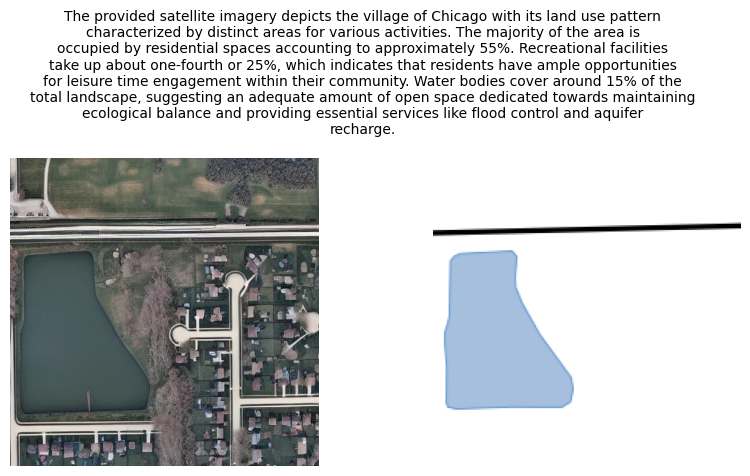

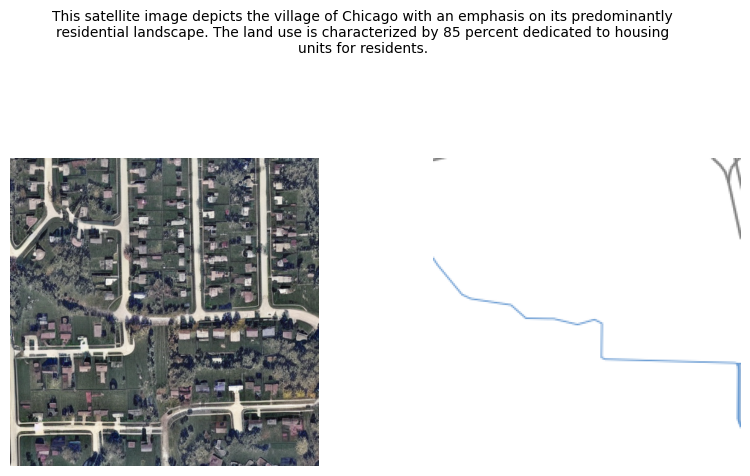

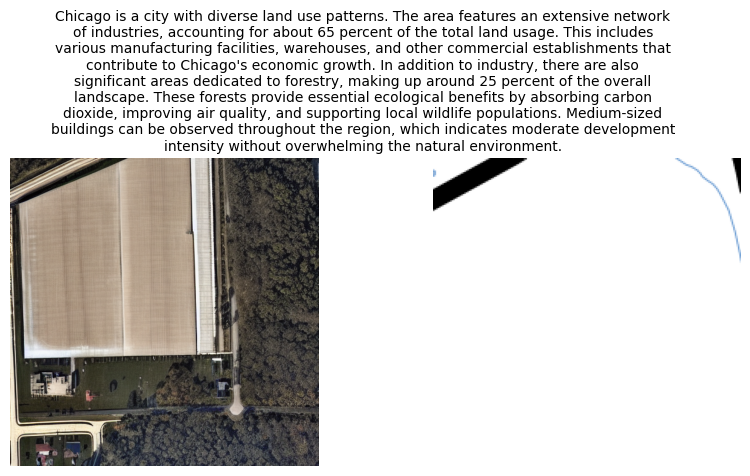

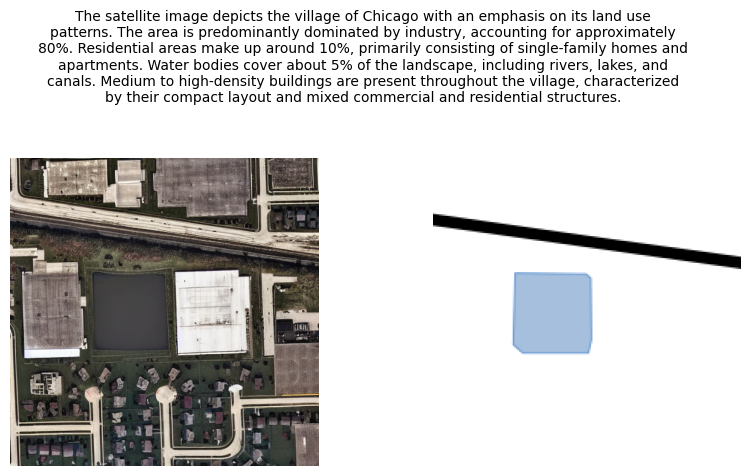

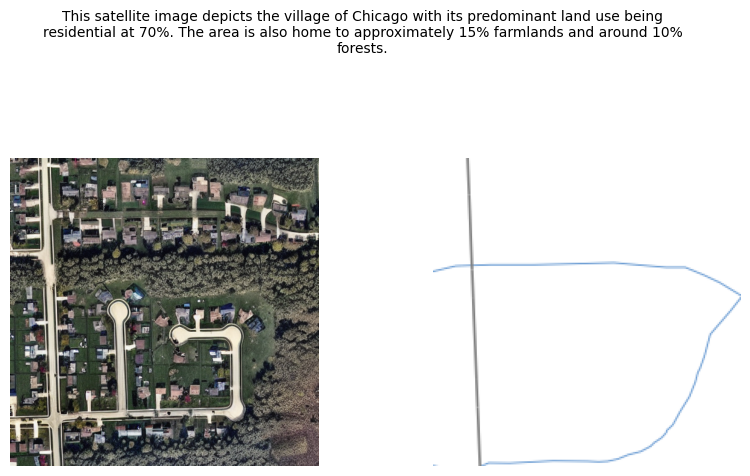

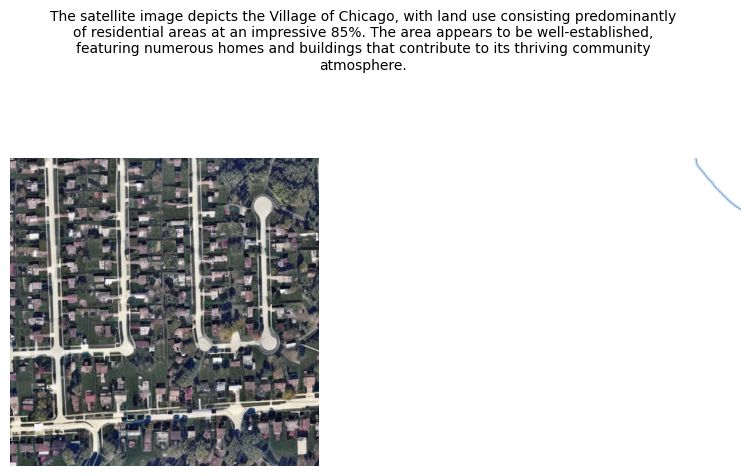

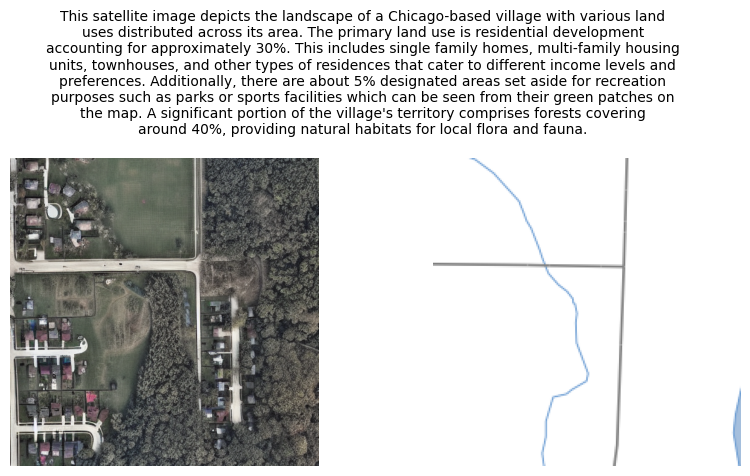

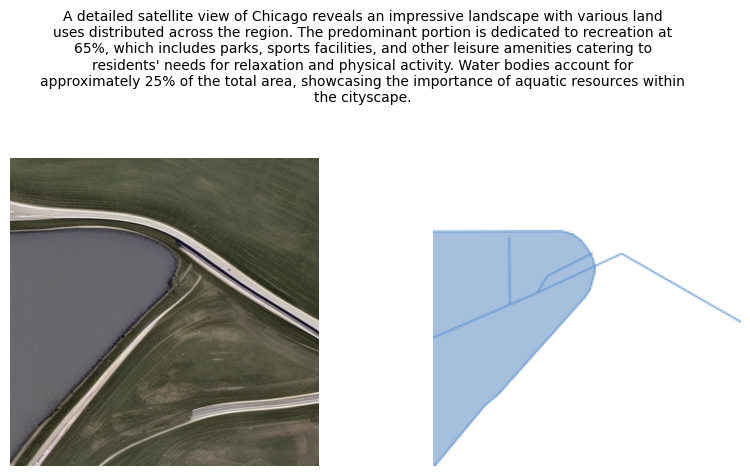

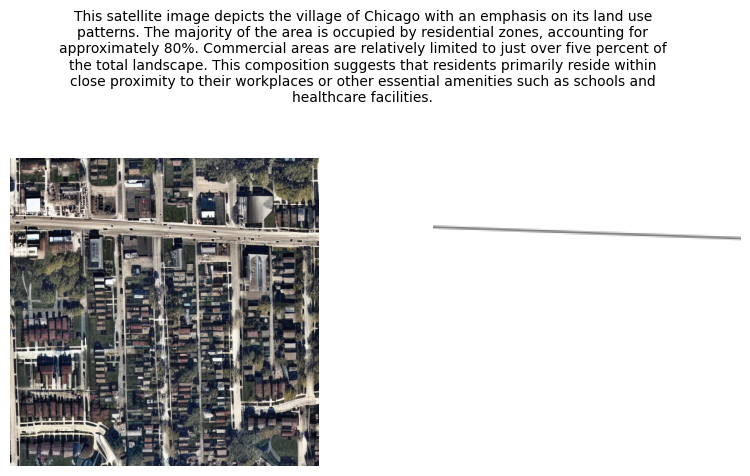

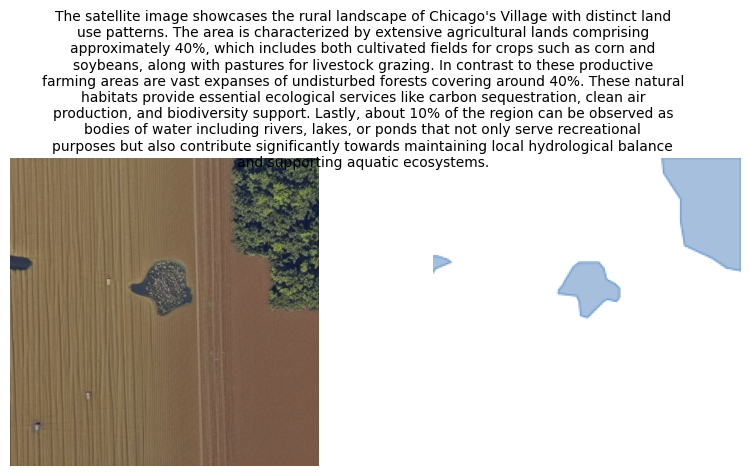

In [6]:
import textwrap
from PIL import Image
import matplotlib.pyplot as plt

for i in range(len(sample)):
    
    target_image = Image.open(sample.iloc[i]['validation_dir']).convert("RGB")
    control_image = Image.open(sample.iloc[i]['conditioning_image_column']).convert("RGB")

    fig, ax = plt.subplots(1,2, figsize=(10, 4))

    ax[0].imshow(target_image)
    ax[1].imshow(control_image)
    ax[0].axis('off')
    ax[1].axis('off')    
    wrapped_title = textwrap.fill(sample.iloc[i]['llm_caption'], width=90)  # Adjust width as needed
    fig.suptitle(wrapped_title, y=1.25, fontsize=10)  # y>1.0 moves title up slightly

In [23]:
idx = 7
model_path = "models/stable-diffusion-v1-5"
controlnet_path = "20250416_v4"
checkpoint = "checkpoint-50000"

control_image_path = sample.loc[idx]['conditioning_image_column']
target_image_path = sample.loc[idx]['image_column']
prompt = sample.loc[idx]['llm_caption']


print(control_image_path)
print(target_image_path)

data/satellite_tiles_control_base/chicago/16+0+0/16767/24337.png
data/satellite_tiles/chicago/16+0+0/16767/24337.png


In [24]:
run_controlnet_validation(
    model_path=model_path,
    controlnet_run=controlnet_path,
    checkpoint=checkpoint,
    prompt=prompt,
    control_image_path=control_image_path,
    target_image_path=target_image_path,
    resolution=512,
    seed=42,
    num_images=3,
    num_steps=30,
    torch_dtype=torch.float16,
)

output/20250416_v4/checkpoint-50000/controlnet


You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 27.57it/s]
You have disabled the safety checker for <class 'train_controlnet_v4.CustomSDControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Saved combined image to output/20250416_v4/log_validation/16+0+0_16767_24337.pngcheckpoint-50000.png
